### Project - Programming for Data Analysis
For this project I have created a data set by simulating a real-world phenomenon - funding applications for SFI grants in Ireland. I investigated a data set that was available on data.gov.ie to see the relationships between variables in the dataset.  I used this information to simulate a data set based on the existing data set. This was done by modelling and synthesising the data using Python, using the numpy.random package. <br>
<br>
The project requirements ask the user to choose a real-world phenomenon that can be measured and with at least one-hundred data points across at least four different variables. Additional requirements include <br>
• Investigate the types of variables involved, their likely distributions, and their relationships with each other. <br>
• Synthesise/simulate a data set as closely matching their properties as possible. <br>
• Detail the research and implement the simulation in a Jupyter notebook - the data set itself can simply be displayed in an output cell within the notebook. <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from information from stackoverflow https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url="http://www.sfi.ie/about-us/women-in-science/gender/SFIGenderDashboard_TableauPublic_2019.csv"
df=pd.read_csv(url)
df


,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount funded
0,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,480000.0,NaN
1,SFI Investigator Programme / Principal Investi...,2014,Declined,Female,790000.0,NaN
2,SFI Investigator Project Award,2012,Declined,Female,200000.0,NaN
3,SFI Starting Investigator Research Grant,2018,Declined,Female,400000.0,NaN
4,SFI Investigator Programme / Principal Investi...,2013,Declined,Male,580000.0,NaN
...,...,...,...,...,...,...
2773,SFI Research Centres,2012,Declined,Male,13650000.0,NaN
2774,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,1090000.0,NaN
2775,SFI Investigator Programme / Principal Investi...,2016,Awarded,Male,2000000.0,2000000.0
2776,SFI Industry Fellowship,2016,Awarded,Female,60000.0,50000.0


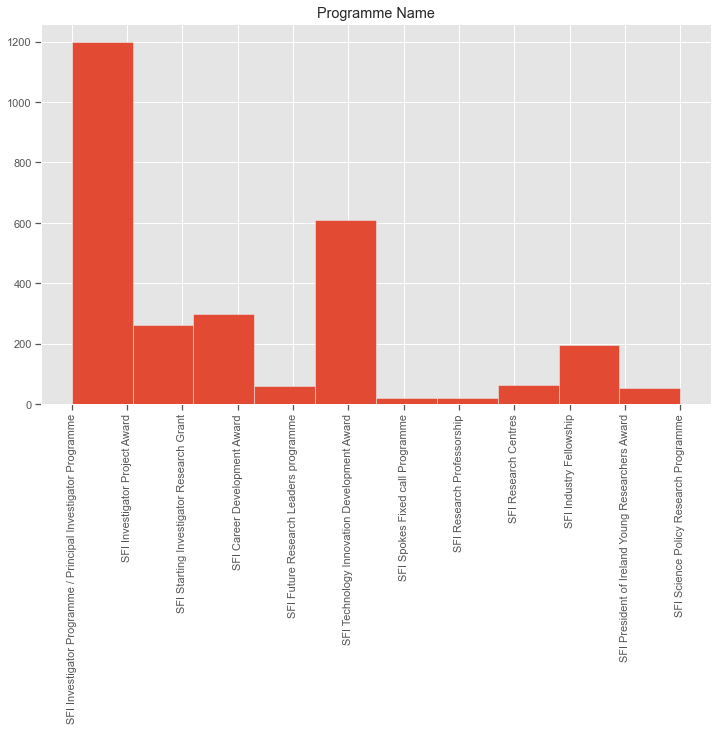

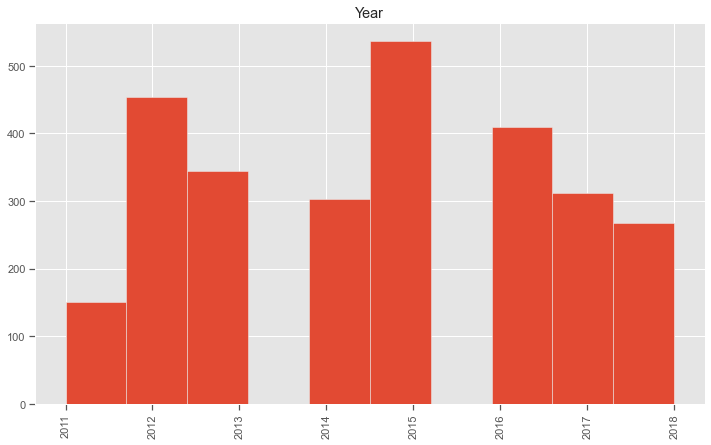

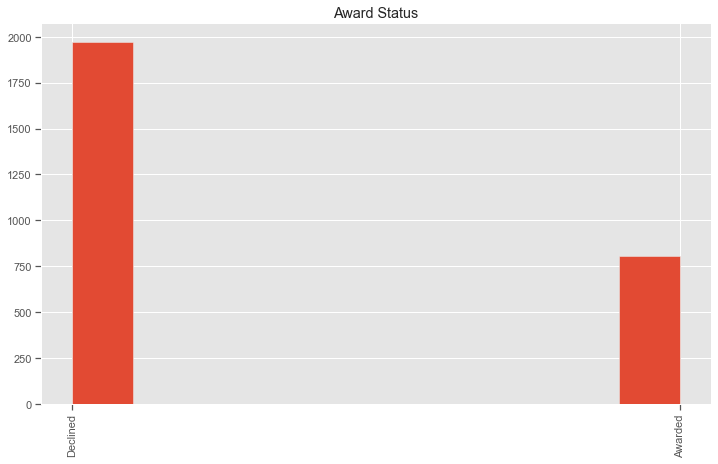

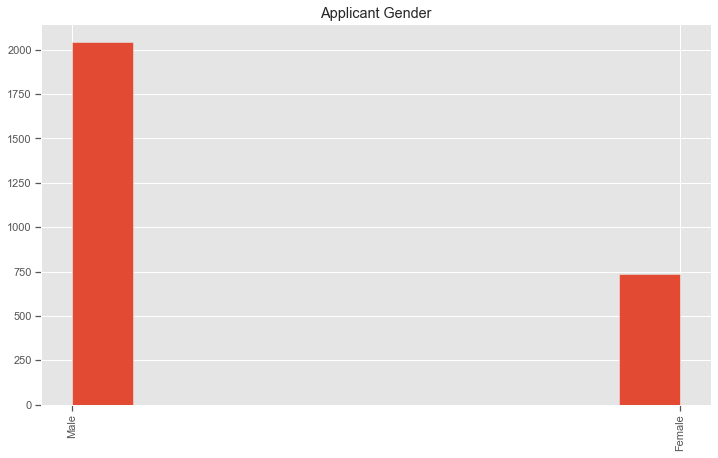

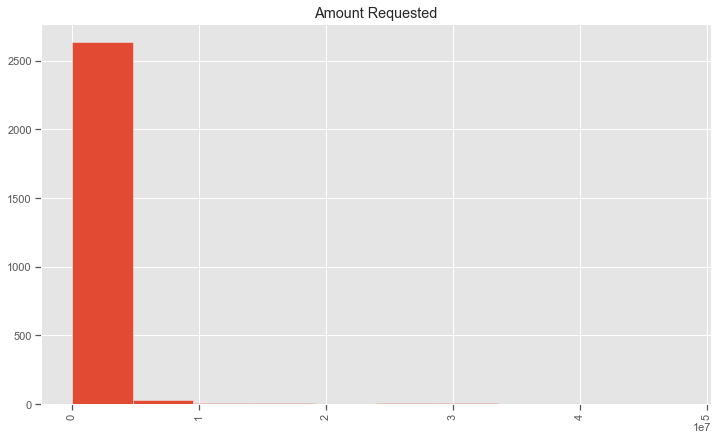

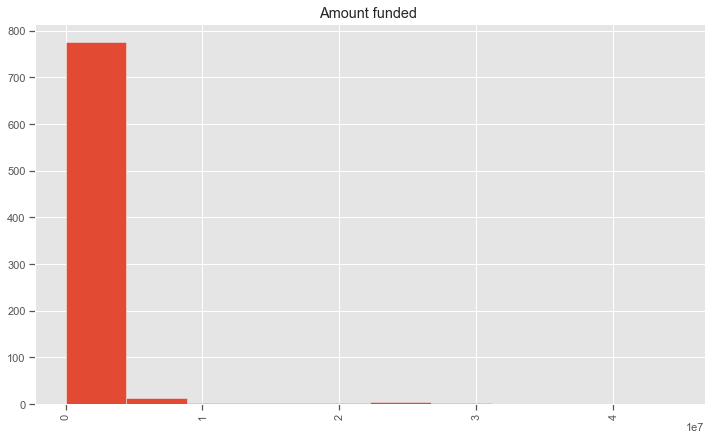

In [9]:

# the for loop will iterate through and develop histograms for each column as defined by the dataframe above
# this will help us to understand the distribution of each variable
# use nicer and bigger plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,7)

for col_name in df.columns[0:6]:
    # create a histogram for each of the variables
    plt.hist(df[col_name])
    plt.title(col_name)
    # rotate the information on the x axis to aid reader 
    # from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()

***
The histograms above indicate, as expected, there is binomial distributions for both the _Award Status_ and _Gender_.  The distribution of the _Programme Name_ resembles a right skewed distribution with a larger proportion of awards sought for _SFI Investigator Programme/Principal Investigator Programme_.

In [19]:
# define the function as used in Assignment for Fundementals of Data Analysis
def count(y):
    # create a dictionary which will use input as keys and the number of times each item appears in the input list as the values
    d = {}
    for i in y:
         # using .get method returns the value for the given key, if present in the dictionary 
         #If not, then it will return none [2, 3].
        d[i] = d.get(i, 0) + 1
    return d

# now to look at the number of items in each of the columns 
prog_name = df["Programme Name"]
award_status = df["Award Status"]
gender = df["Applicant Gender"]

# now we call the function
print("The breakdown of programmes is", count(prog_name))
print("The breakdown of overall award status is", count(award_status))
print("The breakdown of overall gender is", count(gender))



The breakdown of programmes is {'SFI Investigator Programme / Principal Investigator Programme': 926, 'SFI Investigator Project Award': 274, 'SFI Starting Investigator Research Grant': 262, 'SFI Career Development Award': 299, 'SFI Future Research Leaders programme': 59, 'SFI Technology Innovation Development Award': 609, 'SFI Spokes Fixed call Programme': 19, 'SFI Research Professorship': 19, 'SFI Research Centres': 64, 'SFI Industry Fellowship': 195, 'SFI President of Ireland Young Researchers Award': 35, 'SFI Science Policy Research Programme': 17}
The breakdown of overall award status is {'Declined': 1974, 'Awarded': 804}
The breakdown of overall gender is {'Male': 2043, 'Female': 735}


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


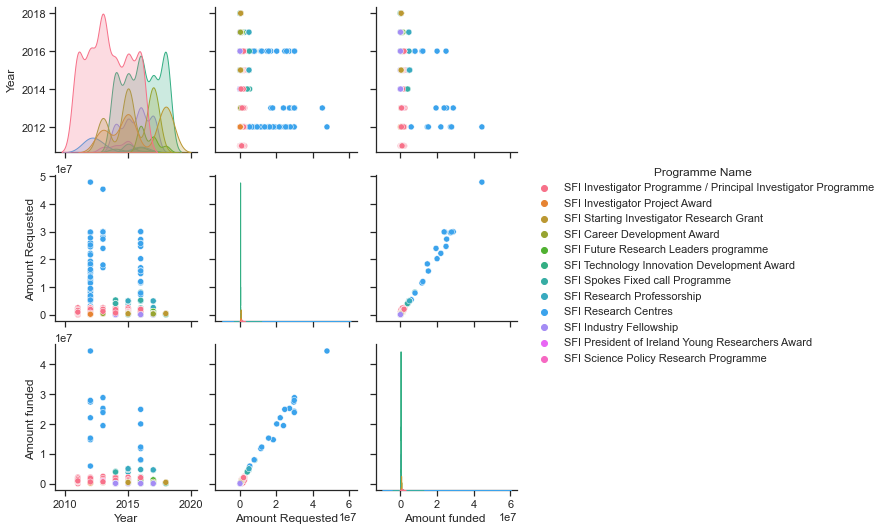

In [7]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Programme Name")
plt.show()

***
## Removing missing data

In [21]:
# as there are a number of rows with missing data in the Amount Requested column I can remove these 
# using guidance from https://machinelearningmastery.com/handle-missing-data-python/
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# drop rows with missing values in the column "Award Requested"
#df.dropna(subset=['Amount Requested'])


In [16]:
# now to look at the number of items in each of the columns 
#my_list = df["Amount Requested"]

# now we call the function
#count(my_list)

***
## Generating a data set
Using the numpy.random package I create the 6 variables that reflect the original data set but are simulated using the RNG function in numpy [ref].
Instead of generating text data I have generated numeric data which can be reformatted at the final stage.??
Using a For Loop to create a dictionary with each of the 6 variables which will act as keys and a unique value being generated for each key in the dictionary and then these can be added to the simulated data set

In [20]:
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng()

# creating a dictionary
#new_data = {Prog_Name_S: ,Year_S: ,Award_Status_S: ,App_Gender_S: ,Amt_Requested_S: , Amt_funded_S: }

#For i in range(1,1000):
    #new_data = {}